<a href="https://colab.research.google.com/github/larrysangfake/financial_econometrics/blob/main/Homework_2_Financial_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2
##Group Members: Linhui Larry Sang, Wan Zheng, Yash Shah


In [1]:
import numpy as np
import yfinance as yf
import zipfile
import pandas as pd
import requests
from io import BytesIO
from scipy.interpolate import interp1d
from scipy import integrate
import scipy.stats as ss
from scipy.stats import norm


###Download Data

In [2]:
import yfinance as yf

# Define the ticker symbol for the VIX (CBOE Volatility Index)
ticker_symbol = '^VIX'

# Define the start and end dates
start_date = '2016-01-01'
end_date = '2016-04-30'

# Download the data from Yahoo Finance
vix_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the downloaded data
print(vix_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2016-01-04  22.480000  23.360001  20.670000  20.700001  20.700001       0
2016-01-05  20.750000  21.059999  19.250000  19.340000  19.340000       0
2016-01-06  21.670000  21.860001  19.799999  20.590000  20.590000       0
2016-01-07  23.219999  25.860001  22.400000  24.990000  24.990000       0
2016-01-08  22.959999  27.080000  22.480000  27.010000  27.010000       0


In [3]:
import zipfile
import pandas as pd
import requests
from io import BytesIO

# URL of the ZIP file
zip_file_url = 'https://github.com/larrysangfake/financial_econometrics/blob/main/SPX_2016_options.csv.zip?raw=true'

# Download the ZIP file
response = requests.get(zip_file_url)
zip_data = BytesIO(response.content)

# Path to the CSV file inside the ZIP file
csv_file_name = 'SPX_2016_options.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_data, 'r') as zip_ref:
    # Extract the CSV file
    zip_ref.extract(csv_file_name, path='.')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_name, header=None)

# Now you can work with the DataFrame (df)
print(df.head())


       0         1       2       3   4   5     6       7       8     9   \
0  108105  20160104  736333  736344  11   1  1000  1007.4  1010.8  2000   
1  108105  20160104  736333  736344  11   1  1025   982.3   985.8     0   
2  108105  20160104  736333  736344  11   1  1050   957.3   960.9     0   
3  108105  20160104  736333  736344  11   1  1075   932.3   935.9     0   
4  108105  20160104  736333  736344  11   1  1100   907.4   911.1     0   

      10  11       12        13  14  15        16  
0  42291 NaN  2012.66 -0.015304   1   1  0.007121  
1      0 NaN  2012.66 -0.015304   1   1  0.007121  
2      0 NaN  2012.66 -0.015304   1   1  0.007121  
3      0 NaN  2012.66 -0.015304   1   1  0.007121  
4     20 NaN  2012.66 -0.015304   1   1  0.007121  


In [4]:
df.columns = [
    'ID', 'Date', 'Julian Date', 'Julian Maturity Date', 'Time Difference in Days', 'Call/Put',
    'Strike Price', 'bid', 'ask', 'Unnamed:9', 'Unnamed:10', 'volatility',
    'stock price', 'Unnamed:13', 'Unnamed: 14', 'Unnamed: 15', 'interest rate'
]

# Print the DataFrame to check the new column names
print(df.head())

       ID      Date  Julian Date  Julian Maturity Date  \
0  108105  20160104       736333                736344   
1  108105  20160104       736333                736344   
2  108105  20160104       736333                736344   
3  108105  20160104       736333                736344   
4  108105  20160104       736333                736344   

   Time Difference in Days  Call/Put  Strike Price     bid     ask  Unnamed:9  \
0                       11         1          1000  1007.4  1010.8       2000   
1                       11         1          1025   982.3   985.8          0   
2                       11         1          1050   957.3   960.9          0   
3                       11         1          1075   932.3   935.9          0   
4                       11         1          1100   907.4   911.1          0   

   Unnamed:10  volatility  stock price  Unnamed:13  Unnamed: 14  Unnamed: 15  \
0       42291         NaN      2012.66   -0.015304            1            1   
1   

###1. Data Cleaning

In [5]:
cleaned_data = df.dropna(subset=['volatility'])
print(cleaned_data.head())

         ID      Date  Julian Date  Julian Maturity Date  \
128  108105  20160104       736333                736344   
129  108105  20160104       736333                736344   
130  108105  20160104       736333                736344   
131  108105  20160104       736333                736344   
132  108105  20160104       736333                736344   

     Time Difference in Days  Call/Put  Strike Price    bid    ask  Unnamed:9  \
128                       11         1          1875  135.3  138.2        500   
129                       11         1          1880  130.1  133.9         12   
130                       11         1          1885  125.4  129.1          0   
131                       11         1          1890  120.7  124.4          5   
132                       11         1          1895  116.5  119.3          0   

     Unnamed:10  volatility  stock price  Unnamed:13  Unnamed: 14  \
128         311    0.149708      2012.66   -0.015304            1   
129          2

###2. Create a new column

In [6]:
cleaned_data['Average Price'] = (cleaned_data['bid'] + cleaned_data['ask']) / 2

# To see the updated DataFrame with the new 'Average Price' column
print(cleaned_data.head())

         ID      Date  Julian Date  Julian Maturity Date  \
128  108105  20160104       736333                736344   
129  108105  20160104       736333                736344   
130  108105  20160104       736333                736344   
131  108105  20160104       736333                736344   
132  108105  20160104       736333                736344   

     Time Difference in Days  Call/Put  Strike Price    bid    ask  Unnamed:9  \
128                       11         1          1875  135.3  138.2        500   
129                       11         1          1880  130.1  133.9         12   
130                       11         1          1885  125.4  129.1          0   
131                       11         1          1890  120.7  124.4          5   
132                       11         1          1895  116.5  119.3          0   

     Unnamed:10  volatility  stock price  Unnamed:13  Unnamed: 14  \
128         311    0.149708      2012.66   -0.015304            1   
129          2

<ipython-input-6-d0d5f6261de8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Average Price'] = (cleaned_data['bid'] + cleaned_data['ask']) / 2


###3. Filter the columns

In [7]:
filtered_df = cleaned_data[(cleaned_data['Average Price'] > 0.05)]

# Check the filtered data
print(filtered_df.head())

         ID      Date  Julian Date  Julian Maturity Date  \
128  108105  20160104       736333                736344   
129  108105  20160104       736333                736344   
130  108105  20160104       736333                736344   
131  108105  20160104       736333                736344   
132  108105  20160104       736333                736344   

     Time Difference in Days  Call/Put  Strike Price    bid    ask  Unnamed:9  \
128                       11         1          1875  135.3  138.2        500   
129                       11         1          1880  130.1  133.9         12   
130                       11         1          1885  125.4  129.1          0   
131                       11         1          1890  120.7  124.4          5   
132                       11         1          1895  116.5  119.3          0   

     Unnamed:10  volatility  stock price  Unnamed:13  Unnamed: 14  \
128         311    0.149708      2012.66   -0.015304            1   
129          2

###4. Out the Money

In [8]:
# Filter Out of the Money Call Options (S < K)
otm_calls = filtered_df[(filtered_df['Call/Put'] == 1) & (filtered_df['stock price'] < filtered_df['Strike Price'])]

# Filter Out of the Money Put Options (S > K)
otm_puts = filtered_df[(filtered_df['Call/Put'] == -1) & (filtered_df['stock price'] > filtered_df['Strike Price'])]

# Combine OTM calls and puts into a single DataFrame
otm_options = pd.concat([otm_calls, otm_puts])

# Check the resulting DataFrame
print(otm_options.head())

         ID      Date  Julian Date  Julian Maturity Date  \
156  108105  20160104       736333                736344   
157  108105  20160104       736333                736344   
158  108105  20160104       736333                736344   
159  108105  20160104       736333                736344   
160  108105  20160104       736333                736344   

     Time Difference in Days  Call/Put  Strike Price   bid   ask  Unnamed:9  \
156                       11         1          2015  23.4  25.5       1852   
157                       11         1          2020  20.6  22.4       1105   
158                       11         1          2025  18.1  20.0       4957   
159                       11         1          2030  15.9  17.7        187   
160                       11         1          2035  13.8  15.6        180   

     Unnamed:10  volatility  stock price  Unnamed:13  Unnamed: 14  \
156        4389    0.195975      2012.66   -0.015304            1   
157        2124    0.19098

###5.The implied volatility

In [9]:
#Black and Scholes
def BlackScholes(CallPutFlag,S,X,v,r,T):

    d1 = (np.log(S/X)+(r+v*v/2.)*T)/(v*np.sqrt(T))

    d2 = d1-v*np.sqrt(T)
    if CallPutFlag=="C":
        P = S*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)

    else:
        P = -S*norm.cdf(-d1) + X*np.exp(-r*T)*norm.cdf(-d2)
    return P


In [10]:
def ivol(K,IV,Kall):
    if Kall>=K[len(K)-1]:
        Kall=K[len(K)-1]
    if Kall<=K[0]:
        Kall=K[0]
    funy = interp1d(K,IV, kind='cubic', fill_value="extrapolate")
    y=funy(Kall)

    if (np.sum(y<0)>0):
        if Kall>=K[len(K)-1]:
            Kall=K[len(K)-1]
        if Kall<=K[0]:
            Kall=K[0]
        funy = interp1d(K,IV, kind='linear', fill_value="extrapolate")
        y=funy(Kall)
    return(y)

In [11]:
def RiskNeutralVolatilitySkewKurt_JVKR(Kvector, IVvector, S0, T, r):
    kmin=.1*S0;
    kmax=3.5*S0;

    def V1(K):
        V1=2*(1-np.log(K/S0))*BlackScholes("C",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2)
        return(V1)
    def V2(K):
        V2=2*(1+np.log(S0/K))*BlackScholes("P",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2);
        return(V2)

    def W1(K):
        W1=(6*np.log(K/S0)-3*np.power(np.log(K/S0),2))*BlackScholes("C",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2);
        return(W1)

    def W2(K):
        W2=(6*np.log(S0/K)+3*np.power(np.log(S0/K),2))*BlackScholes("P",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2);
        return(W2)

    def X1(K):
        X1=(((12*np.power(np.log(K/S0),2) - 4*np.power(np.log(K/S0),3)))*(BlackScholes("C",S0, K, ivol(Kvector,IVvector,K), r, T))/np.power(K,2));
        return(X1)

    def X2(K):
        X2=(((12*np.power(np.log(S0/K),2) + 4*np.power(np.log(S0/K),3)))*(BlackScholes("P",S0, K, ivol(Kvector,IVvector,K), r, T))/np.power(K,2));
        return(X2)
    V=integrate.quad(V1,S0,kmax)[0]+integrate.quad(V2,kmin,S0)[0]
    W=integrate.quad(W1,S0,kmax)[0]-integrate.quad(W2,kmin,S0)[0]
    X=integrate.quad(X1,S0,kmax)[0]+integrate.quad(X2,kmin,S0)[0]
    mu=np.exp(r*T)-1-np.exp(r*T)*V/2-np.exp(r*T)*W/6-np.exp(r*T)*X/24;
    #print(V,W,X,mu)

    vol=np.sqrt(1/T * V);
    skew=( np.exp(r*T)*W - 3*mu*np.exp(r*T)*V + 2*np.power(mu,3)) / np.power(np.exp(r*T)*V - np.power(mu,2),3/2);
    kurt=( np.exp(r*T)*X - 4*mu*np.exp(r*T)*W + 6*np.exp(r*T)*np.power(mu,2)*V - 3*np.power(mu,4)) / np.power(np.exp(r*T)*V - np.power(mu,2),2);

    return([vol,skew,kurt]);

In [ ]:
# Convert dates and calculate time to maturity in years
otm_options['Date'] = pd.to_datetime(otm_options['Date'], format='%Y%m%d')

otm_options['Time to Maturity'] = (otm_options['Time Difference in Days'])/ 365.25

def apply_risk_neutral_vol_skew_kurt(group):
    Kvector = group['Strike Price'].values
    IVvector = group['volatility'].values
    S0 = group['stock price'].iloc[0]
    r = group['interest rate'].iloc[0]
    T = group['Time to Maturity'].iloc[0]

    if len(Kvector) < 2 or len(IVvector) < 2:
        return pd.Series([np.nan] * len(group), index=group.index)  # Return a Series of NaNs with the same index as the group

    # Calculate risk-neutral volatility, skewness, and kurtosis
    vol, skew, kurt = RiskNeutralVolatilitySkewKurt_JVKR(Kvector, IVvector, S0, T, r)
    return pd.Series([vol] * len(group), index=group.index)  # Return a Series with the calculated volatility repeated for each item in the group

# Apply the function to each group and create a new DataFrame with the results
volatility_results = otm_options.groupby(['Date', 'Julian Maturity Date']).apply(apply_risk_neutral_vol_skew_kurt).reset_index()
volatility_results.rename(columns={0: 'Implied Volatility'}, inplace=True)

# Merge the results back to the original DataFrame
otm_options = pd.merge(otm_options, volatility_results, on=['Date', 'Julian Maturity Date'], how='left')

# Display the results
print(otm_options[['Date', 'Julian Maturity Date', 'Implied Volatility']].head())

In [ ]:
# Convert dates and calculate time to maturity in years
otm_options['Date'] = pd.to_datetime(otm_options['Date'], format='%Y%m%d')
otm_options['Time to Maturity'] = otm_options['Time Difference in Days'] / 365.25

# Define a function to apply risk-neutral volatility, skewness, and kurtosis calculation
def apply_risk_neutral_vol_skew_kurt(group):
    # Extract group-level constants
    S0 = group['stock price'].iloc[0]
    r = group['interest rate'].iloc[0]
    T = group['Time to Maturity'].iloc[0]

    # Calculate implied volatility, skewness, and kurtosis
    if len(group) < 2:
        return pd.Series([np.nan] * len(group), index=group.index)  # Return NaNs for groups with insufficient data
    else:
        vol, skew, kurt = RiskNeutralVolatilitySkewKurt_JVKR(group['Strike Price'].values, group['volatility'].values, S0, T, r)
        return pd.Series([vol] * len(group), index=group.index)  # Repeat the calculated volatility for each item in the group

# Apply the function to each group and create a new DataFrame with the results
volatility_results = otm_options.groupby(['Date', 'Julian Maturity Date']).apply(apply_risk_neutral_vol_skew_kurt)

# Merge the results back to the original DataFrame
otm_options['Implied Volatility'] = volatility_results.reset_index(level=[0, 1], drop=True)

# Display the results
print(otm_options[['Date', 'Julian Maturity Date', 'Implied Volatility']].head())


In [ ]:
# Merge the results back to the original DataFrame
otm_options = pd.merge(otm_options, volatility_results, on=['Date', 'Julian Maturity Date'], how='left')

# Display the results
print(otm_options[['Date', 'Julian Maturity Date', 'Implied Volatility']].head())

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Assuming otm_options is predefined
unique_dates = otm_options['Julian Date'].unique()
unique_maturities = otm_options['Julian Maturity Date'].unique()

results = []

for date in unique_dates:
    for maturity in unique_maturities:
        subset = otm_options[(otm_options['Julian Date'] == date) & (otm_options['Julian Maturity Date'] == maturity)]

        if len(subset) > 1:
            K = subset['Strike Price'].values
            IV = subset['volatility'].values  # Ensure this column is correctly filled

            # Safely apply interpolation
            try:
                # Assuming ivol is already defined and handles extrapolation or errors internally
                interp_func = interp1d(K, IV, kind='linear', fill_value='extrapolate', bounds_error=False)
                subset = subset.copy()  # Work on a copy to avoid SettingWithCopyWarning
                subset['implied_volatility'] = subset['Strike Price'].apply(lambda x: interp_func(x))
                results.append(subset)
            except Exception as e:
                print(f"Error in interpolation for date {date} and maturity {maturity}: {e}")

# Combine all results into a single DataFrame
result_df = pd.concat(results, ignore_index=True)

print(result_df.head())

       ID      Date  Julian Date  Julian Maturity Date  \
0  108105  20160104       736333                736344   
1  108105  20160104       736333                736344   
2  108105  20160104       736333                736344   
3  108105  20160104       736333                736344   
4  108105  20160104       736333                736344   

   Time Difference in Days  Call/Put  Strike Price   bid   ask  Unnamed:9  \
0                       11         1          2015  23.4  25.5       1852   
1                       11         1          2020  20.6  22.4       1105   
2                       11         1          2025  18.1  20.0       4957   
3                       11         1          2030  15.9  17.7        187   
4                       11         1          2035  13.8  15.6        180   

   Unnamed:10  volatility  stock price  Unnamed:13  Unnamed: 14  Unnamed: 15  \
0        4389    0.195975      2012.66   -0.015304            1            1   
1        2124    0.190988   

###6. 30-day volatility

In [ ]:
import pandas as pd
from scipy.interpolate import interp1d


# otm_options['Date'], otm_options['Time Difference in Days'], otm_options['Implied Volatility']

# Function to interpolate and find IV at 30 days maturity
def interpolate_iv_at_30(group):
    # Extract days and IVs from the group
    days = group['Time Difference in Days'].values
    ivs = group['Implied Volatility'].values

    # Check if interpolation is possible
    if min(days) <= 30 <= max(days):  # Only interpolate if 30 is within the range of existing data points
        interp_function = interp1d(days, ivs, kind='linear', bounds_error=False, fill_value="extrapolate")
        return interp_function(30)
    else:
        return np.nan  # Return NaN if 30 days is out of the range

# Apply the interpolation function to each group of data by 'Date'
otm_options['IV at 30 Days'] = otm_options.groupby('Date').apply(interpolate_iv_at_30)

# Resulting DataFrame with interpolated IV at 30 days
print(otm_options[['Date', 'IV at 30 Days']].drop_duplicates())


In [ ]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np


# Define a function to handle interpolation for a single date's data
def interpolate_iv_at_30_days(maturity_days, volatilities):
    """Interpolates to find the implied volatility at 30 days maturity."""
    try:
        # Ensure there is a range that includes 30 days to perform interpolation
        if min(maturity_days) <= 30 <= max(maturity_days):
            interp_func = interp1d(maturity_days, volatilities, kind='linear', fill_value='extrapolate')
            return interp_func(30)
        else:
            # If 30 days is out of the bounds of the data, return NaN or handle accordingly
            return np.nan
    except Exception as e:
        # Handle exceptions possibly raised by interpolation
        return np.nan

# Create a new column to store the interpolated results
result_df['IV at 30 Days'] = np.nan  # Initialize the column

for (date, strike), group in result_df.groupby(['Date', 'Strike Price']):
    days = group['Time Difference in Days'].values
    vols = group['implied_volatility'].values

    iv_at_30 = interpolate_iv_at_30_days(days, vols)
    result_df.loc[group.index, 'IV at 30 Days'] = iv_at_30

print(result_df[['Date', 'Strike Price', 'IV at 30 Days']])

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


            Date  Strike Price  IV at 30 Days
0       20160104          2015       0.178585
1       20160104          2020       0.176077
2       20160104          2025       0.173692
3       20160104          2030       0.171277
4       20160104          2035       0.168972
...          ...           ...            ...
272073  20160429          2045       0.150440
272074  20160429          2050       0.148260
272075  20160429          2055       0.145948
272076  20160429          2060       0.143685
272077  20160429          2065       0.141575

[272078 rows x 3 columns]


###7. Plot

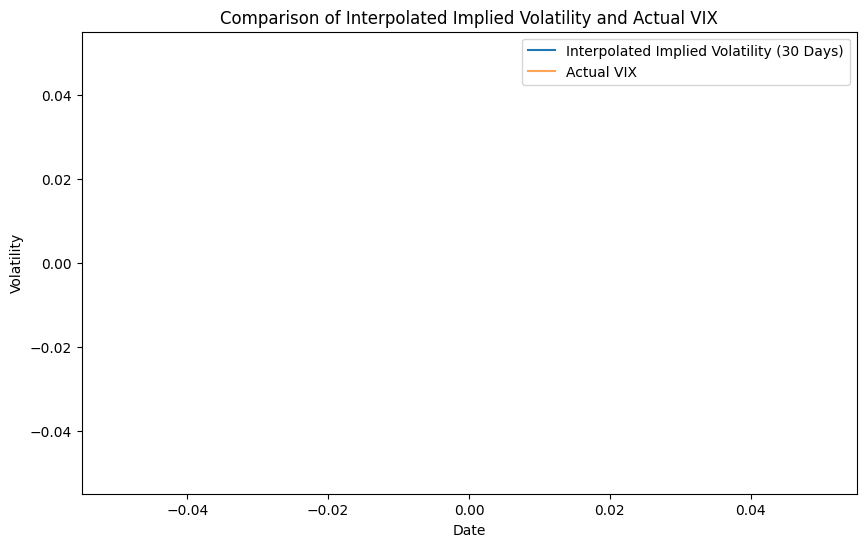

The correlation between the interpolated implied volatility and the actual VIX is: nan


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'otm_options' is your DataFrame with options data that includes a 'Date' column
# and 'IV at 30 Days' which we previously calculated

# Convert the index of the VIX data to a datetime (if not already)
vix_data.index = pd.to_datetime(vix_data.index)

# Merge the VIX data with your options data
combined_data = pd.merge(otm_options, vix_data['Adj Close'], left_on='Date', right_index=True, how='inner')
combined_data.rename(columns={'Adj Close': 'VIX'}, inplace=True)

# Plot the actual VIX and the interpolated IV
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['VIX'], label='Actual VIX', color='blue')
plt.plot(combined_data['Date'], combined_data['IV at 30 Days'], label='Interpolated IV at 30 Days', color='red')
plt.title('Actual VIX vs. Interpolated Implied Volatility at 30 Days')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the correlation
correlation = combined_data['VIX'].corr(combined_data['IV at 30 Days'])
print(f"Correlation between Actual VIX and Interpolated IV at 30 Days: {correlation:.3f}")



###Paper codes